In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

In [0]:
#parameters
learning_rate = 0.0033
training_epochs = 1000
display_step = 100

In [0]:
#generate training data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]


In [0]:
#tf graph input
X = tf.placeholder('float')
Y = tf.placeholder('float')

#set the weights of model
W = tf.Variable(rng.randn(), name='weight')
b = tf.Variable(rng.randn(), name='bias')

epoch: 0001 cost= 4.025788307 W= 0.29720387 b= 0.24742591
epoch: 0001 cost= 3.249805212 W= 0.3321935 b= 0.2553781
epoch: 0001 cost= 3.251495600 W= 0.33246782 b= 0.255428
epoch: 0001 cost= 4.213757992 W= 0.36363244 b= 0.2600725
epoch: 0001 cost= 3.400228977 W= 0.3139589 b= 0.2529046
epoch: 0001 cost= 3.393004179 W= 0.31427565 b= 0.2529806
epoch: 0001 cost= 3.342143536 W= 0.31683907 b= 0.25324273
epoch: 0001 cost= 3.251301050 W= 0.3325091 b= 0.2557775
epoch: 0001 cost= 3.291037560 W= 0.32000956 b= 0.25413066
epoch: 0001 cost= 3.248288631 W= 0.3239199 b= 0.25593516
epoch: 0001 cost= 3.301808119 W= 0.33739924 b= 0.2578493
epoch: 0001 cost= 3.589881420 W= 0.3065091 b= 0.25498673
epoch: 0001 cost= 3.920146465 W= 0.2983223 b= 0.25344583
epoch: 0001 cost= 3.425388575 W= 0.3123022 b= 0.25519398
epoch: 0001 cost= 3.231671572 W= 0.3271933 b= 0.2578277
epoch: 0001 cost= 3.612218142 W= 0.30572394 b= 0.2555117
epoch: 0001 cost= 3.544405222 W= 0.30770332 b= 0.25615022
epoch: 0101 cost= 2.759247541 W=

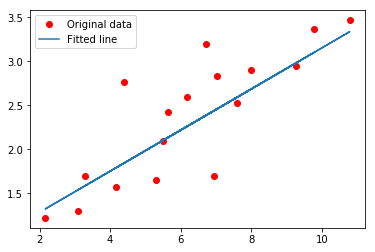

testing......(Mean square loss comparison)
Testing cost= 1.4460177
Absolute mean square loss difference: 1.3542638


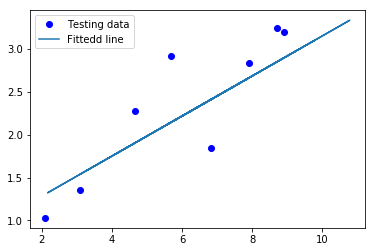

In [30]:
#construct a linear model
pred = tf.add(tf.multiply(X, W), b)

#define loss function
#cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
cost = tf.reduce_sum(tf.pow(pred-Y, 2))


optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)

  for epoch in range(training_epochs):
    for (x, y) in zip(train_X, train_Y):
      sess.run(optimizer, feed_dict={X: x, Y:y})

      if epoch % display_step == 0:
        c = sess.run(cost, feed_dict={X:train_X, Y: train_Y})
        print('epoch:', '%04d' % (epoch+1), 'cost=', "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
  print('Training finished!')
  
  training_cost = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
  print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

  #graph display
  plt.plot(train_X, train_Y, 'ro', label='Original data')
  plt.plot(train_X, sess.run(W)*train_X+sess.run(b), label='Fitted line')
  plt.legend()
  plt.show()

  #Testing example
  test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
  test_Y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])
  print('testing......(Mean square loss comparison)')

  testing_cost = sess.run(cost, feed_dict={X:test_X, Y:test_Y})

  print('Testing cost=', testing_cost)
  print('Absolute mean square loss difference:', abs(training_cost - testing_cost))

  plt.plot(test_X, test_Y, 'bo', label='Testing data')
  plt.plot(train_X, sess.run(W)*train_X+sess.run(b), label='Fittedd line')
  plt.legend()
  plt.show()
